In [24]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
# Loading the dataset
file_path = "display.csv"
df = pd.read_csv(file_path)

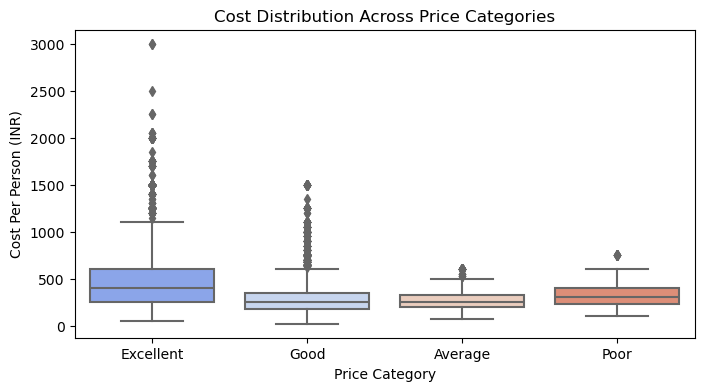

In [26]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['Category'], y=df['Cost_Per_Person'], palette="coolwarm")
plt.xlabel("Price Category")
plt.ylabel("Cost Per Person (INR)")
plt.title("Cost Distribution Across Price Categories")
plt.show()


C:\Users\padit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


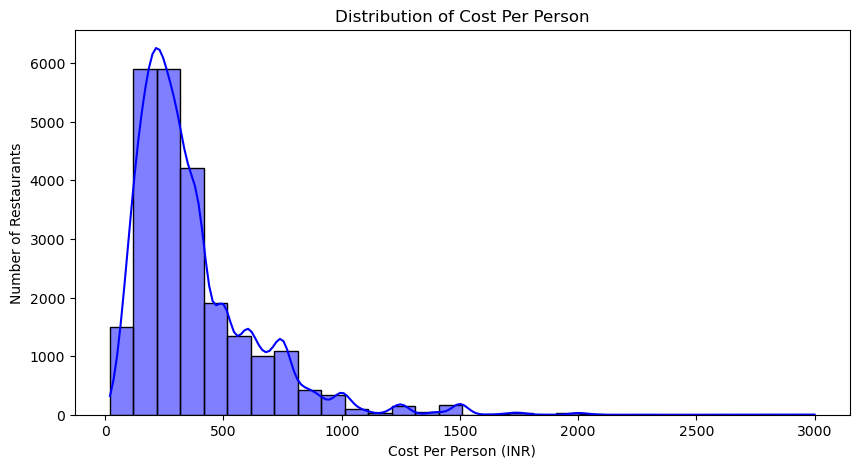

In [27]:
# Histogram for Cost Per Person
plt.figure(figsize=(10, 5))
sns.histplot(df['Cost_Per_Person'], bins=30, kde=True, color="blue")  # KDE for smooth curve
plt.xlabel("Cost Per Person (INR)")
plt.ylabel("Number of Restaurants")
plt.title("Distribution of Cost Per Person")
plt.show()


In [28]:
# Selecting all the necessary columns
columns_to_keep = ["City", "Cost_Per_Person", "No_of_Varieties", "No_of_Best_Sellers", "Menu", "Delivery", "Rating"]


In [29]:
# Identifying all the cuisine columns (binary 1s and 0s)
cuisine_columns = [col for col in df.columns if df[col].nunique() == 2 and set(df[col].unique()) == {0, 1}]


In [30]:
# Final dataset with selected columns
df_filtered = df[columns_to_keep + cuisine_columns].copy()

In [31]:
# Convert Rating to numeric
df_filtered["Rating"] = pd.to_numeric(df_filtered["Rating"], errors="coerce")

In [32]:
# Convert "Yes"/"No" to 1/0 for Menu and Delivery
df_filtered["Menu"] = df_filtered["Menu"].map({"Yes": 1, "No": 0})
df_filtered["Delivery"] = df_filtered["Delivery"].map({"Yes": 1, "No": 0})

In [33]:
# Drop rows with missing values
df_filtered.dropna(inplace=True)


In [34]:
# One-Hot Encode City
df_encoded = pd.get_dummies(df_filtered, columns=["City"], drop_first=True)

In [35]:
# Initialize MinMax Scaler
scaler = MinMaxScaler()

In [36]:
# Scale numerical features
df_encoded[["Cost_Per_Person", "No_of_Varieties", "No_of_Best_Sellers"]] = scaler.fit_transform(
    df_encoded[["Cost_Per_Person", "No_of_Varieties", "No_of_Best_Sellers"]])


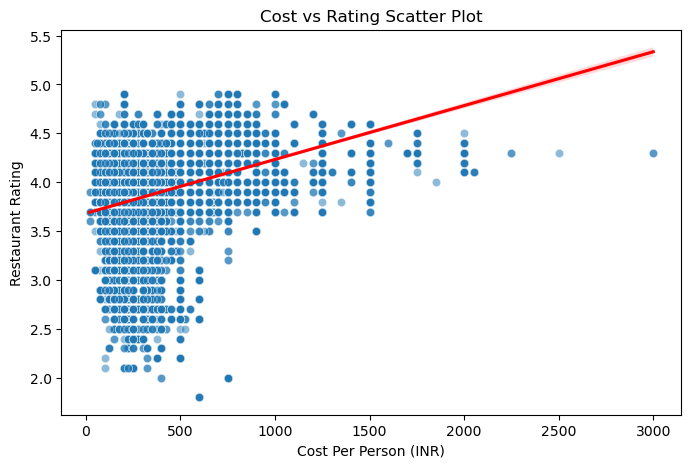

In [37]:
# Scatter plot of Cost Per Person vs Rating
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Cost_Per_Person'], y=df['Rating'], alpha=0.5)

# Optional: Add a trendline
sns.regplot(x=df['Cost_Per_Person'], y=df['Rating'], scatter=False, color='red')

plt.xlabel("Cost Per Person (INR)")
plt.ylabel("Restaurant Rating")
plt.title("Cost vs Rating Scatter Plot")
plt.show()

C:\Users\padit\AppData\Local\Temp\ipykernel_6008\2407105846.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df['No_of_Varieties'], y=df['Rating'], estimator=lambda x: sum(x) / len(x), ci=None, palette="viridis")


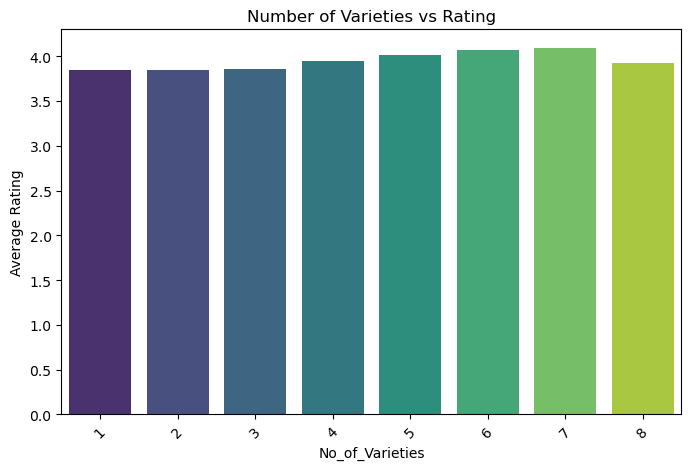

In [38]:
# Bar plot of Number of Varieties vs Average Rating
plt.figure(figsize=(8, 5))
sns.barplot(x=df['No_of_Varieties'], y=df['Rating'], estimator=lambda x: sum(x) / len(x), ci=None, palette="viridis")
plt.xlabel("No_of_Varieties")
plt.ylabel("Average Rating")
plt.title("Number of Varieties vs Rating")
plt.xticks(rotation=45)
plt.show()

In [39]:
# Define features and target
X = df_encoded.drop(columns=["Rating"])  # All columns except Rating
Y = df_encoded["Rating"]  # Target variable

In [40]:
# Split data: 80% training, 20% testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [ ]:
# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, Y_train)

In [ ]:
# Make predictions
y_pred = model.predict(X_test)

In [ ]:
# Calculate and print metrics
mae = mean_absolute_error(Y_test, y_pred)
mse = mean_squared_error(Y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, y_pred)


In [ ]:
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")

In [ ]:
# Save the model and feature names
with open("model.pkl", "wb") as file:
    pickle.dump(model, file)

In [ ]:
with open("columns.pkl", "wb") as file:
    pickle.dump(X.columns.tolist(), file)  # Save feature names
